<a href="https://colab.research.google.com/github/blkeyd/CVPR/blob/main/MID/Assignment1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate Synthetic dataset (5 classes)

In [2]:
n_classes = 5
samples_per_class = 200
N = n_classes * samples_per_class

# Centers for each class
centers = np.array([
    [-4.0, -4.0],
    [-4.0,  4.0],
    [ 4.0, -4.0],
    [ 4.0,  4.0],
    [ 0.0,  0.0]
])

X = np.zeros((N, 2))
y = np.zeros(N, dtype = int)

for i in range(n_classes):
    start = i * samples_per_class
    end = (i+1) * samples_per_class
    X[start:end] = centers[i] + 0.9 * np.random.randn(samples_per_class, 2)
    y[start:end] = i


perm = np.random.permutation(N)       #Shuffle dataset
X = X[perm]
y = y[perm]


# One-hot encoding
def one_hot(labels, num_classes):             # One-hot encoding
    oh = np.zeros((labels.shape[0], num_classes))
    for i in range(labels.shape[0]):
        oh[i, labels[i]] = 1
    return oh

Y = one_hot(y, n_classes)

# Train/Test split
split = int(0.8 * N)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
y_train, y_test = y[:split], y[split:]

# Plot Synthetic dataset

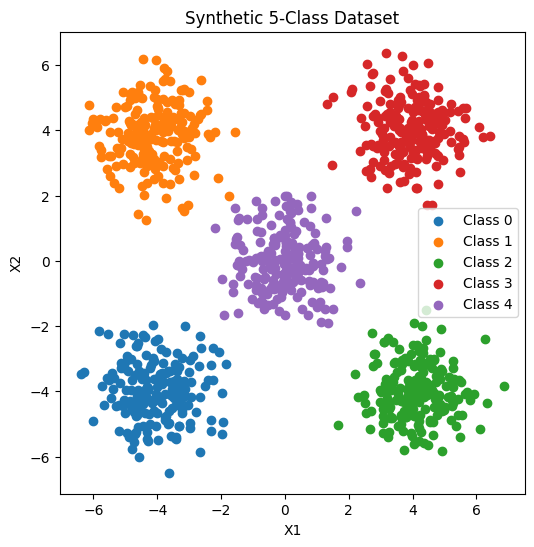

In [3]:
plt.figure(figsize=(6,6))
for c in range(n_classes):
    plt.scatter(X[y==c,0], X[y==c,1], label=f'Class {c}')
plt.title("Synthetic 5-Class Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Neural Network Class

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        input_neurons = 2
        hidden1 = 16
        hidden2 = 12
        hidden3 = 8
        output_neurons = 5

        self.lr = 0.01

        # Weight initialization

        self.W1 = np.random.randn(input_neurons, hidden1)
        self.W2 = np.random.randn(hidden1, hidden2)
        self.W3 = np.random.randn(hidden2, hidden3)
        self.W4 = np.random.randn(hidden3, output_neurons)

        self.b1 = np.zeros((1, hidden1))
        self.b2 = np.zeros((1, hidden2))
        self.b3 = np.zeros((1, hidden3))
        self.b4 = np.zeros((1, output_neurons))



    # ReLU activation
    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)



    # Softmax output
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)



    # Feedforward
    def feedForward(self, X):
        self.h1 = self.relu(np.dot(X, self.W1) + self.b1)
        self.h2 = self.relu(np.dot(self.h1, self.W2) + self.b2)
        self.h3 = self.relu(np.dot(self.h2, self.W3) + self.b3)
        self.out = self.softmax(np.dot(self.h3, self.W4) + self.b4)
        return self.out


    # Backpropagation
    def backPropagation(self, X, Y, pred):
        m = X.shape[0]

        # Output layer error
        delta4 = (pred - Y) / m
        dW4 = np.dot(self.h3.T, delta4)
        db4 = np.sum(delta4, axis=0, keepdims=True)

         # Layer 3

        delta3 = np.dot(delta4, self.W4.T) * self.relu(self.h3, der=True)
        dW3 = np.dot(self.h2.T, delta3)
        db3 = np.sum(delta3, axis=0, keepdims=True)

         # Layer 2
        delta2 = np.dot(delta3, self.W3.T) * self.relu(self.h2, der=True)
        dW2 = np.dot(self.h1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

         # Layer 1
        delta1 = np.dot(delta2, self.W2.T) * self.relu(self.h1, der=True)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)


        # Update weights
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1


    # Train
    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

    # Predict
    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)

# Training Loop with Loss and Accuracy

In [5]:
NN = NeuralNetwork()
epochs = 500
loss_list = []
acc_list = []

for i in range(epochs):
    NN.train(X_train, Y_train)

    pred_train = NN.feedForward(X_train)

    # Loss (MSE)
    loss_list.append(np.mean(np.square(Y_train - pred_train)))

    # Accuracy
    y_pred_train = np.argmax(pred_train, axis=1)
    acc_list.append(np.mean(y_pred_train == y_train))

   # Print every 20 epochs
    if (i+1) % 20 == 0:
        print(f"Epoch {i+1}: Loss={loss_list[-1]:.4f}, Accuracy={acc_list[-1]:.4f}")

Epoch 20: Loss=0.0643, Accuracy=0.7525
Epoch 40: Loss=0.0563, Accuracy=0.8013
Epoch 60: Loss=0.0507, Accuracy=0.8187
Epoch 80: Loss=0.0464, Accuracy=0.8363
Epoch 100: Loss=0.0426, Accuracy=0.8525
Epoch 120: Loss=0.0395, Accuracy=0.8688
Epoch 140: Loss=0.0367, Accuracy=0.8800
Epoch 160: Loss=0.0343, Accuracy=0.8925
Epoch 180: Loss=0.0321, Accuracy=0.9025
Epoch 200: Loss=0.0303, Accuracy=0.9137
Epoch 220: Loss=0.0286, Accuracy=0.9200
Epoch 240: Loss=0.0272, Accuracy=0.9275
Epoch 260: Loss=0.0260, Accuracy=0.9313
Epoch 280: Loss=0.0249, Accuracy=0.9350
Epoch 300: Loss=0.0240, Accuracy=0.9363
Epoch 320: Loss=0.0232, Accuracy=0.9400
Epoch 340: Loss=0.0223, Accuracy=0.9425
Epoch 360: Loss=0.0214, Accuracy=0.9450
Epoch 380: Loss=0.0204, Accuracy=0.9475
Epoch 400: Loss=0.0195, Accuracy=0.9525
Epoch 420: Loss=0.0186, Accuracy=0.9563
Epoch 440: Loss=0.0177, Accuracy=0.9587
Epoch 460: Loss=0.0168, Accuracy=0.9600
Epoch 480: Loss=0.0160, Accuracy=0.9613
Epoch 500: Loss=0.0153, Accuracy=0.9613


# Loss and Accuracy Plot

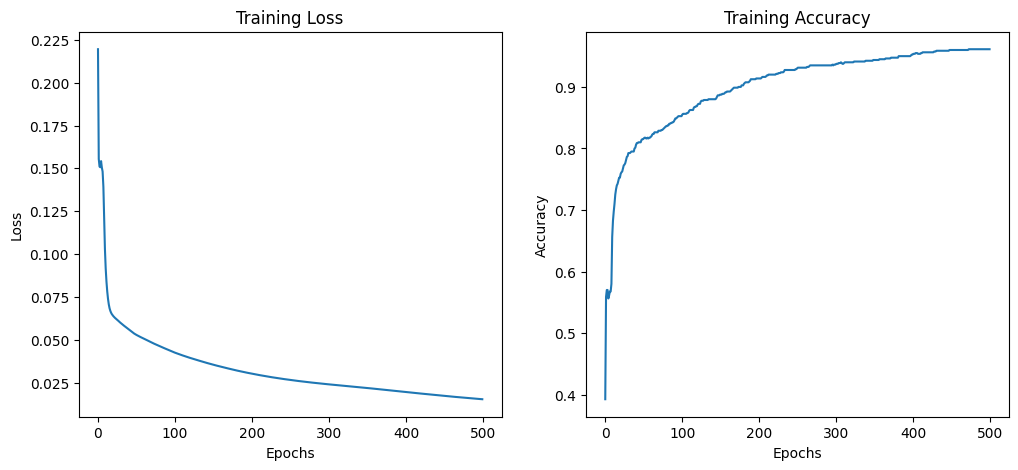

In [6]:
#Loss Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(loss_list)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(acc_list)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Test Evaluation

In [7]:
y_pred_test = NN.predict(X_test)
accuracy = np.mean(y_pred_test == y_test)
print("Test Accuracy:", accuracy)

# Precision, Recall, F1 per class
precision, recall, f1 = [], [], []

for c in range(n_classes):
    tp = np.sum((y_test == c) & (y_pred_test == c))
    fp = np.sum((y_test != c) & (y_pred_test == c))
    fn = np.sum((y_test == c) & (y_pred_test != c))

    p = tp / (tp + fp) if (tp + fp) > 0 else 0
    r = tp / (tp + fn) if (tp + fn) > 0 else 0
    f = 2 * p * r / (p + r) if (p + r) > 0 else 0

    precision.append(p)
    recall.append(r)
    f1.append(f)

for c in range(n_classes):
    print(f"Class {c}: Precision={precision[c]:.3f}, Recall={recall[c]:.3f}, F1-score={f1[c]:.3f}")

print("Overall Macro F1-score:", np.mean(f1))

Test Accuracy: 0.95
Class 0: Precision=0.941, Recall=1.000, F1-score=0.970
Class 1: Precision=0.973, Recall=0.973, F1-score=0.973
Class 2: Precision=0.960, Recall=0.960, F1-score=0.960
Class 3: Precision=0.961, Recall=1.000, F1-score=0.980
Class 4: Precision=0.893, Recall=0.781, F1-score=0.833
Overall Macro F1-score: 0.9432006552006552


# Plot Dataset and Predicted Labels

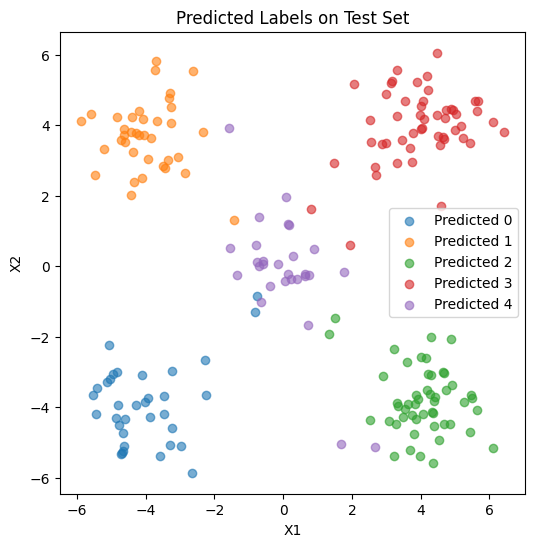

In [9]:
plt.figure(figsize=(6,6))
for c in range(n_classes):
    plt.scatter(X_test[y_pred_test==c,0], X_test[y_pred_test==c,1], label=f'Predicted {c}', alpha=0.6)
plt.title("Predicted Labels on Test Set")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Confusion Matrix

Confusion Matrix (rows=true, columns=predicted):
[[32  0  0  0  0]
 [ 0 36  0  0  1]
 [ 0  0 48  0  2]
 [ 0  0  0 49  0]
 [ 2  1  2  2 25]]


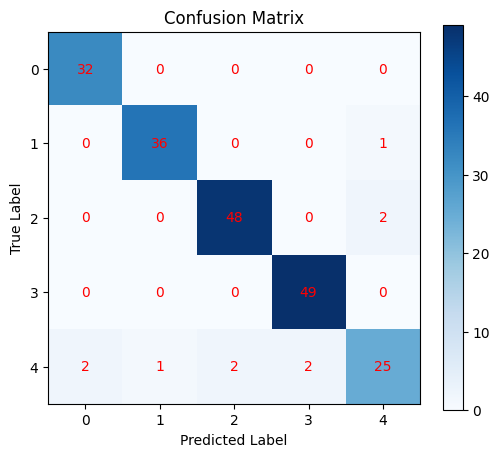

In [10]:
conf_mat = np.zeros((n_classes, n_classes), dtype=int)

for true, pred_label in zip(y_test, y_pred_test):
    conf_mat[true, pred_label] += 1

print("Confusion Matrix (rows=true, columns=predicted):")
print(conf_mat)

# Optional: Plot as heatmap
plt.figure(figsize=(6,5))
plt.imshow(conf_mat, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.xticks(np.arange(n_classes))
plt.yticks(np.arange(n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, conf_mat[i,j], ha='center', va='center', color='red')
plt.show()

# Documentation:
  1. Modifications Made for Multi-Class Classification.

The original binary neural network was modified to handle multi-class classification with five classes. The output layer was extended from a single neuron to five neurons, each representing one class, and the network architecture was updated to include three hidden layers. The activation function for the output layer was changed from sigmoid to softmax to produce class probabilities, and the loss function was updated from mean squared error to categorical cross-entropy, which is better suited for multi-class problems. Backpropagation was adjusted to propagate errors correctly through multiple output neurons and hidden layers.

   2. Activation Function and Loss

For the hidden layers, the sigmoid function is still used as in the original code, while the softmax function at the output layer ensures that the predicted values are valid probabilities summing to 1. This allows the network to handle multi-class outputs effectively. The categorical cross-entropy loss function measures the difference between predicted probabilities and the true one-hot encoded labels, providing a more suitable error signal for multiple classes.

To calculate the loss during training, the network computes the negative log likelihood of the correct class probability for each sample and averages it over all samples. This combination of softmax activation and cross-entropy loss is mathematically more stable and ensures faster and more accurate convergence than using sigmoid with mean squared error for multi-class classification.

   3. Dataset Generation and Evaluation

A synthetic dataset with five distinct classes was generated to train and test the network. Each class was assigned unique patterns in the input space, and the labels were one-hot encoded to match the five-neuron output layer. The dataset was split into training and testing sets to evaluate the performance of the network.

Evaluation metrics include accuracy, precision, recall, and F1-score for each class and overall, providing a comprehensive view of the model’s performance. Additionally, a confusion matrix is computed to visualize the number of correct and incorrect predictions for each class. Loss and accuracy curves are plotted during training to monitor the learning progress and ensure proper convergence of the network.

   4. Challenges and Solutions

A major challenge was the low accuracy (~20-25%) when applying the original sigmoid and mean squared error setup to multi-class classification. This issue was resolved by replacing the output layer activation with softmax and using categorical cross-entropy as the loss function. Another challenge was correctly implementing backpropagation for multiple output neurons, which was addressed by computing the output delta as the difference between softmax probabilities and one-hot encoded labels. These modifications enabled the network to effectively learn multi-class patterns.

# Result and Analysis:

We implemented a three hidden layer neural network with ReLU activation in the hidden layers and softmax at the output to handle five-class classification. The training loss decreased steadily, and the accuracy improved with each epoch, indicating effective learning. The confusion matrix showed most samples were correctly classified, with minor confusion between similar classes. Using ReLU helped in faster convergence compared to sigmoid.

We observed that increasing hidden neurons improved performance up to a point, while too many neurons caused slight overfitting. Adjusting the learning rate impacted convergence stability, and three hidden layers provided a good balance between model complexity and accuracy. Overall, the network performed well on this synthetic dataset with proper hyperparameter tuning.


# Conclusion:

In this assignment, we implemented a three hidden layer neural network for multi-class classification on a synthetic dataset with five classes. Using ReLU in hidden layers and softmax in the output layer allowed the network to learn efficiently and handle multiple classes effectively.

The network successfully reduced loss and improved accuracy over training, with evaluation metrics accuracy, precision, recall, and F1-score demonstrating good performance. The confusion matrix confirmed that most samples were correctly classified.

Key challenges included adapting backpropagation for multi-class output and tuning weights and learning rate. Lessons learned highlight the importance of activation functions and proper loss calculation. Future improvements could include larger datasets, different hidden layer sizes, regularization techniques, or advanced optimizers to further enhance performance.